In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [3]:
import matplotlib as mpl

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

import sys
sys.setrecursionlimit(1000000000)

import collections as col

# The Ising model in 2D
The Hamiltonian of the Ising model is

$$
\mathcal{H} = -\sum_{\langle ij \rangle} J s_i s_j - H \sum_i s_i
$$

In this exercise, we focus on the case $J=1, H=0$, that is, a ferromagnetic system with no external field. Remember that the sum $\langle ij \rangle$ runs over neighbouring sites only. In our 2D lattice, each site has 4 neighbours. 

<img src="attachment:image.png" width="250"> 


We will work with **periodic boundary conditions**, so that all spins have 4 neighbours. 

<img src="attachment:image.png" width="250"> 


# The Metropolis algorithm
We will build a simple implementation of the **Metropolis** algorithm for the 2D Ising model. 

As a reminder, a single update of the Metropolis algorithm works as follows:

1. Pick a site $(i, j)$ at random.
2. Calculate the energy change $\Delta E$ that flipping the spin $s_{ij}$ would produce.
3. If $\Delta E <0$, flip the spin with probability $1$.
4. If $\Delta E >0$, flip the spin with probability $e^{-\beta \Delta E}$.

### Exercice 4.1
Write a function that, given an integer $N$, returns an $N \times N$ array whose elements are randomly picked from {-1, 1}. 

In [4]:
def create_initial_config(N=None):
    """
    Create the starting initial configuration.
    
    All elements are {-1, 1} with 50% prob.
    The lattice is a square of size N.
    
    Parameters
    ----------
    N : int
        The system size.

    Returns
    -------
    config : np.array, (N, N)
        A random {-1, 1} array of size (N, N).
    """
    config = np.random.choice([-1,1], [N,N])
    return config

#print(create_initial_config(5))

Let us create an initail configuration with our `create_inital_config_function`. A system size of $N=100$ will be enough.

In [5]:
config = create_initial_config(N=100)

To plot our system we can use `plt.imshow()`, as follows:

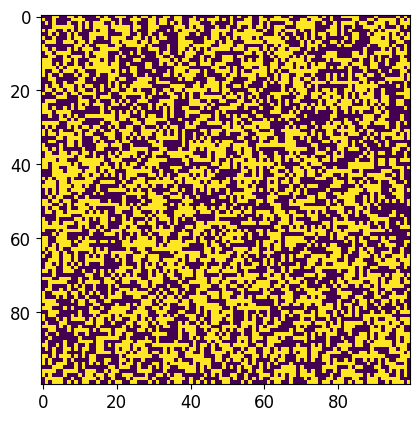

In [6]:
plt.imshow(config);

### Exercise 4.2
We will write our Metropolis update function. Given a site $(i, j)$, what is the change in energy $\Delta E$ that flipping $S(i, j)$ entails?
Recall that only 4 spins are connected to $(i, j)$, so you don't need to compute the energy of the whole system.

La variazione di energia è una quantità che dipende solo dallo spin che viene girato e da quelli ad esso adiacenti. La $\Delta E$ è quindi pari a:
$$
\Delta E = 2spin(i,j) \cdot \left(spin(i,j+1) + spin(i,j-1) + spin(i-1,j) + spin(i+1, j)\right)
$$
Questo si ha perchè la variazione di energia è definita come energia della configurazione finale meno quella della configurazione iniziale: il cambio di spin comporta la presenza di un ulteriore fattore meno al primo dei due termini che si traduce nella espressione riportata in precedenza.

### Exercise 4.3
Write a function called `metropolis_single_update()`.  
The **input** should be:

+ *config*, a lattice configuration as an (N, N) array.
+ *T*, the temperatue.

There is no need to return anything since in python, functions can modify its input, so we will be updating config *inplace*. But it is useful to return the energy change $\Delta E$ if one later wants to track the energy during simulations. To simplify things, we will use **periodic boundary conditions** (in python, the modulo operator is `%`).

In [7]:
def metropolis_single_update(config=None, T=None):
    '''
    Do a single Monte Carlo update using Metropolis algorithm.
    
    Parameters
    ----------
    config : np.array, (N, N)
        The current configuration.
    T : float
        The temperature.

    '''
    # make sure config is square
    N, M = config.shape
    assert N == M
    
    # choose random site
    i = np.random.randint(N)
    j = np.random.randint(M)
    s =  config[i, j]
        
    # compute energy cost of flip
    # DeltaE is the possible energy cost
    # effDeltaE is the real energy cost (depending on whether we did the flip or not)
    DeltaE = 2 * (s*config[i, (j+1)%M] + s*config[i, (j-1)%M] + s*config[(i+1)%N, j] + s*config[(i-1)%N, j])
    effDeltaE = 0

    # case DeltaE < 0, flip the spin with prob 1 
    if DeltaE < 0:
        # flip the sping
        s *= -1
        # set effective DeltaE to DeltaE 
        effDeltaE = DeltaE
        
    # case DeltaE >= 0
    else:
        # flip the spin with certain probability
        if np.random.rand() < np.exp(-DeltaE/T):
            # flip the sping
            s *= -1
            # set effective Delta E 
            effDeltaE = DeltaE
        
    # update configuration
    # notice there is no need to return the whole configuration, the function
    # will modify config _in_place_
    config[i, j] = s
    
    # but it is clever to return the effective DeltaE, since we have already computed it
    # notice that if we didn't flip the spin, the change in energy is 0
    return effDeltaE

## Visualizing the simulation on real time
To see if our Metropolis algorithm works, you might want to simulate systems at different temperatures, and observe how the configuration evolves trought time. To do this you need the `display` module. Below you will find an example of how to use it.

For the 2D Ising model, the **critical temperature** is known to be
$$
T_c = \frac{2}{\ln(1+\sqrt{2})} \simeq 2.2691853...
$$
(with $k_B=1$). Try executing the cell below at different values of the temperature, for different system size. 

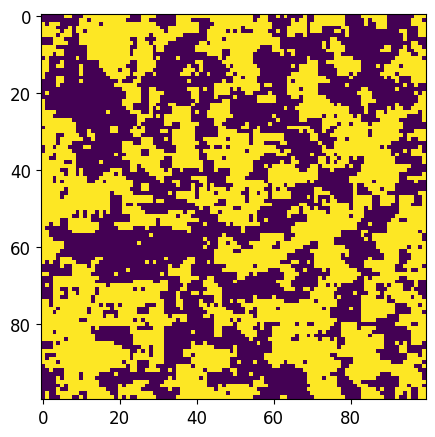

In [8]:
T_c = 2/np.log(1+np.sqrt(2))

# create initial random configuration
config = create_initial_config(N=100)

# set up figure, plot first frame
fig, ax = plt.subplots(1, 1, figsize=(6,5))
# draw the initial configuration,
# naming the plot "im".
im = ax.imshow(config)

for t in range(100000):
    # update the system
    DeltaE = metropolis_single_update(config, T=T_c)
    # replot every 1000 MC updates
    if t%1000==0:
        # update the data of the plot (not the whole figure!)
        im.set_data(config)
        # rerender
        display.display(plt.gcf())
        display.clear_output(wait=True)

### Exercice 4.4
Write a function that computes the energy of a configuration, and another that tracks its evolution over time.

In [9]:
def get_energy(config):
    """
    Compute the energy of a configuration.
    
    The energy is defined as $E = -\sum_{(a, b)} S_a S_b$,    
    where the sum runs over pairs of adjacent spins.
    
    Parameters
    ----------
    config : np.array, (N, N)
        The system configuration.
        
        
    Returns
    -------
    E : float
        The energy of the configuration.
    """
    N = len(config)
    # list of pairs of adjacent sites as four-element tuples:
    # (i1, j1, i2, j2) represents two adjacent sites located
    # at (i1, j1) and (i2, j2)
    horizontal_edges = [
        (i, j, i, (j+1)%N)
        for i in range(N) for j in range(N)
    ]
    vertical_edges = [
        (i, j, (i+1)%N, j)
        for i in range(N) for j in range(N)
    ]
    # summing lists in python concatenates them
    # [1, 2, 3] + [4, 5] = [1, 2, 3, 4, 5]
    edges = horizontal_edges + vertical_edges
    E = 0
    for i1, j1, i2, j2 in edges:
        E -= config[i1, j1] * config[i2, j2]
    
    return E

In [10]:
#Test metodo considerato
config = np.array([[1,-1,1], [-1,-1,1], [1, 1, -1]])
print(config)
print(f"L'energia del sistema considerato è pari a: {get_energy(config)}")


[[ 1 -1  1]
 [-1 -1  1]
 [ 1  1 -1]]
L'energia del sistema considerato è pari a: 6


In [11]:
def get_energy_evolution(N=20, T=T_c, n_updates=50000):
    """
    Compute the energy evolution of a 2D Ising instance.
    
    Parameters
    ----------
    N : int
        The system size.
    T : float
        The temperature.
    n_updates : int
        Number of Metropolis updates.
        
    Returns
    -------
    Es : np.array, (n_updates, )
    """
    
    #Creo la configurazione iniziale
    config = create_initial_config(N)
    #Creo il vettore per contenere le energie
    energy = np.empty(n_updates+1)
    #Calcolo la energia iniziale
    energy[0] = get_energy(config)
    
    #Evolvo il sistema il numero di volte desiderato
    for i in range(1, n_updates+1, 1):
        #Evolvo la mia configurazione
        metropolis_single_update(config = config, T = T_c)
        #Calcolo la nuova energia del sistema
        energy[i] = get_energy(config)
    
    return energy

### Exercise 4.5
Compute the energy of your system during a long simulation, and plot it as a function of time. **Tip** Use logarithmic x-axis!

In [12]:
energy_evolution = get_energy_evolution(N=20, T=T_c, n_updates=50000)

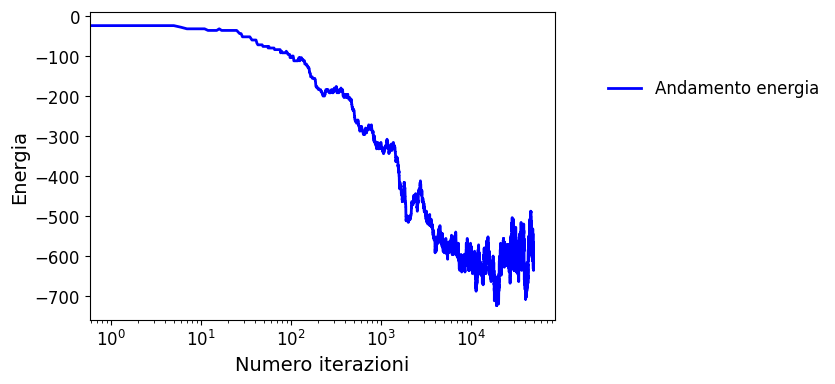

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

#Vettore per le ascisse
asc = np.array([
    t
    for t in range(0, 50001, 1)
])

ax.semilogx(
    asc, energy_evolution,
    color = "blue",
    lw = 2,
    label = "Andamento energia"
    )

ax.set_xlabel(f"Numero iterazioni")
ax.set_ylabel(f"Energia")
ax.legend(loc=(1.1, 0.7), frameon=False)

### Exercise 4.6
Can you distinguish two qualitatively different periods? What do they correspond to?

Nel grafico riportato in precedenza si possono distinguere due comportamenti sostanzialmente differenti. In un caso (ossia dalle prime evoluzioni fino a circa 4000 update della configurazione) l'energia del sistema decresce in modo continuativo: in questa fase dell'evoluzione del sistema gli spin vengono orientati in modo tale da minimizzare l'energia. Nella seconda parte del grafico (ossia per numero di iterazioni superiore a 4000) l'energia oscilla attorno a un certo valore medio - tali fluttuazioni sono di natura statistica dovute al flip a volte inconveniente di alcuni spin.

# Efficient Metropolis
Our implementation of the Ising model was not very efficient. To do this exercice, we will use part of the code from Sethna's book, which is much more efficient and can be found here:

[Sethan's book computer exercices](http://pages.physics.cornell.edu/~myers/teaching/ComputationalMethods/ComputerExercises/Ising/Ising.html)

To import code from an external file, we need to add its directory to the PATH



In [14]:
import sys
# sys.path.append("")
from ising_sethna import IsingModel

Their implementation is based on a `Class`, which means we need to instantiate the model. For instance:

In [15]:
# create an instance of IsingModel
ising = IsingModel(N=100)

In [16]:
# the state of the system is stored in .lattice
ising.lattice

array([[1, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 0, 1]])

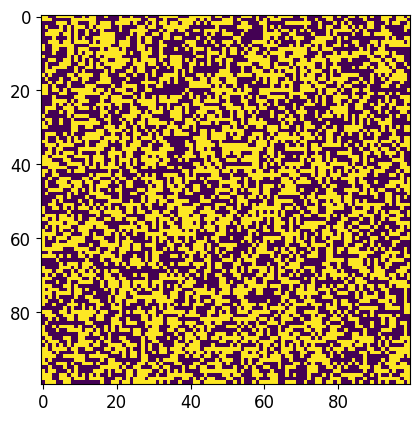

In [17]:
mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True
plt.imshow(ising.lattice)

Notice that this implementation uses 0, 1 spins instead of -1, 1 as we are used to! To run the simulation, we call the `.SweepMetropolis()` method. If you go to the source file at `SethnasBookCode/Ising.py`, you can inspect all the code. You will notice that all `.Sweep...()` methods perform $N^2$ updates per time-step. This is useful because time-scales become independent of system size.

In [18]:
ising.SweepMetropolis(nTimes=100)

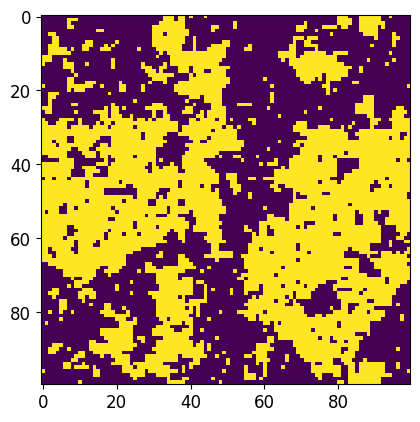

In [19]:
plt.imshow(ising.lattice)

The cell bellow will display 3 systems side-by-side, running at different temperatures. All parameters are set at the top. Try changing some values and see what happens.

In [20]:
#################
# set parameters
system_size = 100
H = 0.0
T_below = 1.5
T_critical = 2.269185314213022
T_above = 3.5
n_sweeps = 100
###############

# create three instances of IsingModel
ising_below = IsingModel(N=system_size, T=T_below, H=H)
ising_critical = IsingModel(N=system_size, T=T_critical, H=H)
ising_above = IsingModel(N=system_size, T=T_above, H=H)

# give them names
isings = [ising_below, ising_critical, ising_above]
labels = ["below $T_c$", "at $T_c$", "above $T_c$"]

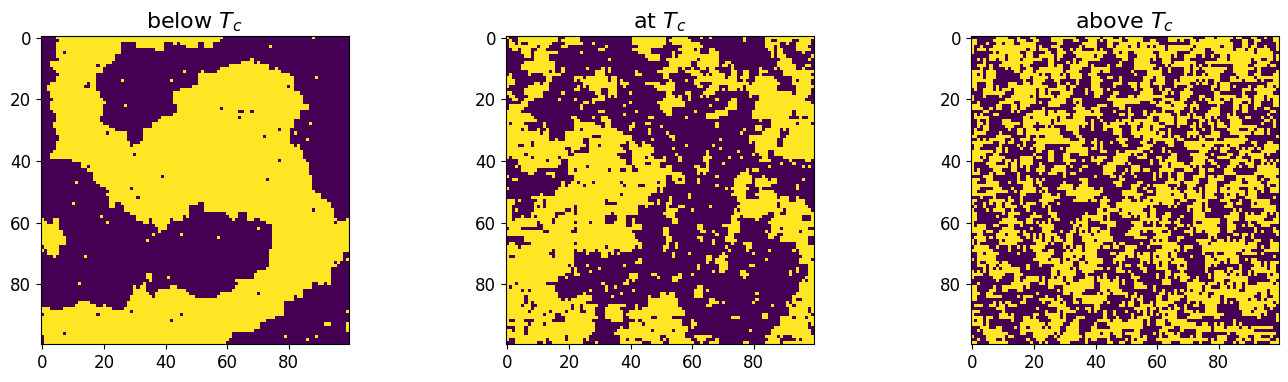

In [21]:
fig, axx = plt.subplots(1, 3, figsize=(17,4))
heatmap = {}
for ax, ising, label in zip(axx, isings, labels):
    heatmap[label] = ax.imshow(ising.lattice)
    ax.set_title(label, fontsize=16)

for _ in range(n_sweeps):
    for ax, ising, label in zip(axx, isings, labels):
        ising.SweepMetropolis(nTimes=1)
        heatmap[label].set_data(ising.lattice)
    display.display(plt.gcf())
    display.clear_output(wait=True)

### Exercice 4.7
How much faster is Sethna's implementation with respect to ours? Use the cell magic `%%timeit` to measure how long a command takes to execute.

To do a fair comparison, remember to take into account what "one update" means for each case.

In [22]:
%%timeit
# your Ising implementation running for some number of updates
nit = 400

get_energy_evolution(N = 20, n_updates = nit)

168 ms ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%%timeit
# Sethan's implementation running for some **equivalent** number of updates
prova = IsingModel(N=20, T=T_c, H=0)

prova.SweepMetropolis(nTimes=1)

1.27 ms ± 8.85 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Notiamo che il metodo di Sethna è nettamente più veloce ed ottimizzato del nostro codice, in quanto il tempo di esecuzione per loop risulta essere circa un duecentesimo di quanto necessario per il codice scritto in precedenza.

## Magnetization
We will now compute the magnetization $M$ as a function of the temperature $T$. To speed up simulations even more, we will use the Wolff algorithm, which Sethna's code already implements in the `.SweepWolff()` method.

### Exercise 4.8
For a system of size $N=100$, approximately how many sweeps of the Wolff algorithm are necessary in practice to be in equilibrium? Try starting with smaller values of $N$, and increase gradually. 

In [24]:
#Funzione per calcolare energia con matrice di sethna
def get_energy_st(config):

    N = len(config)
    # list of pairs of adjacent sites as four-element tuples:
    # (i1, j1, i2, j2) represents two adjacent sites located
    # at (i1, j1) and (i2, j2)
    horizontal_edges = [
        (i, j, i, (j+1)%N)
        for i in range(N) for j in range(N)
    ]
    vertical_edges = [
        (i, j, (i+1)%N, j)
        for i in range(N) for j in range(N)
    ]
    # summing lists in python concatenates them
    # [1, 2, 3] + [4, 5] = [1, 2, 3, 4, 5]
    edges = horizontal_edges + vertical_edges
    E = 0
    for i1, j1, i2, j2 in edges:
        E -= 4*config[i1, j1]*config[i2, j2] + 1 - 2 * (config[i1, j1] + config[i2, j2])
    
    return E

In [25]:
#Setto sistema e temperatura
N = 100
T = T_c

#Creo il sistema su cui lavoro
prova = IsingModel(N=N, T=T, H=0)
#Vettore per le energie
energia_m = np.zeros(21)
#Valuto l'energia della configurazione iniziale
energia_m[0] = get_energy_st(prova.lattice)


#evolvo un certo numero di volte il sistema - riempio vettore delle energie
for i in range(1, 21, 1):
    prova.SweepWolff(nTimes=1)
    energia_m[i] = get_energy_st(prova.lattice)

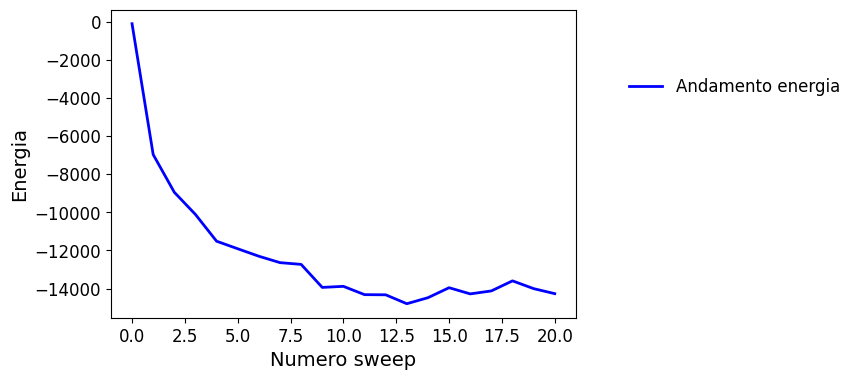

In [26]:
#Creo il grafico per l'equilibrio

#Asse delle ascisse
ascisse = np.array([
    t
    for t in range (0, 21, 1)
])

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.plot(
    ascisse, energia_m,
    color = "blue",
    lw = 2,
    label = "Andamento energia",
    )

ax.set_xlabel(f"Numero sweep")
ax.set_ylabel(f"Energia")
ax.legend(loc=(1.1, 0.7), frameon=False)

Come visibile nel grafico precedente, il sistema giunge alla configurazione di equilibrio dopo 8 sweep.

### Exercise 4.9
Write a function that computes the magnetization of a 2D Ising system after certain equilibration period.

In [27]:
def calculate_magnetization(system_size=None, temperature=None, equilibration_time=None):

    #Creo il modello su cui lavoro
    sistema = IsingModel(N=system_size, T=temperature, H=0)
    #Equilibro il sistema
    sistema.SweepWolff(nTimes=8)
    
    #Computo la magnetizzazione del sistema
    #La magnetizzazione del sistema è data dalla somma degli spin
    m = 0
    for i in range(0, system_size):
        for t in range(0, system_size):
            m += 2*sistema.lattice[i, t]-1  
    
    return m/(system_size * system_size)


### Exercise 4.10
+ Compute the magnetization for a system of size $N=64$, for diverent values of $T\in[1.5, 3.5]$.
+ Remember to choose wisely the equilibration time!
+ Plot $|M|$ as a function of $T$, and mark the critical temperature in your plot using the `plt.axvline()` function.

In [28]:
# define range of temperatures
temperatures = np.linspace(1.5, 3.5, num=100)
# system size
system_size = 64
# equilibration time
equilibration_time = 8

# loop over temperatures, compute magnetizations
i = 0
magnetizations = np.zeros(100)
for temperature in temperatures:
    magnetization = calculate_magnetization(system_size=system_size, temperature=temperature, equilibration_time=10)
    magnetizations[i] = magnetization
    i += 1

Text(0, 0.5, 'Magnetizzazione')

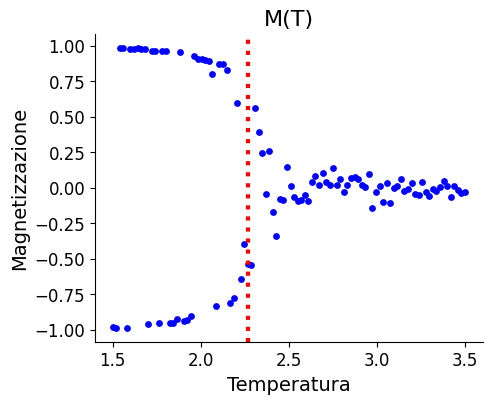

In [29]:
# define critical temperature
T_c = 2.269185314213022

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.scatter(
    temperatures, magnetizations,
    # style keywords
    edgecolors= "blue", color="blue", s=15
)
ax.axvline(
    T_c,
    # style keywords
    c= "red", lw= "3", ls= ":"
)
ax.set_title(f"M(T)")
ax.set_xlabel(r"Temperatura")
ax.set_ylabel(r"Magnetizzazione")

## Susceptibility and Specific Heat


In this exercice, we will compute the susceptibility $\chi$ and the specific heat $C$. Using formula (6.13) in the book, we have that
$$
C = \frac{1}{T^2} \left\langle (E - \langle E \rangle)^2 \right\rangle.
$$
Remember that this is only valid in **equilibrium**, which means that we can only measure energy fluctuations **after a transient** equilibration time.

### Exercise 4.11
Find a convenient formula to measure the susceptibility $\chi$ in a simulation.

$$
\chi = \frac{1}{k_BT^2} \left\langle(M  - \langle M \rangle \right)^2\rangle = \frac{1}{k_BT^2} \left(\left\langle M^2 \right\rangle  - \langle M \rangle^2 \right)
$$

### Exercise 4.12
Write a function that computes the energy of an Ising configuration.

As usually, you can use the **template** below if it helps you, or if you prefer you can also write **your own function** from scratch.

In [30]:
#Ritorna un valor medio per particella
def compute_energy(ising):
    """Compute the energy of an ising object."""
    config = ising*2-1
    N = len(config)
    
    horizontal_edges = [
        (i, j, i, (j+1)%N)
        for i in range(N) for j in range(N)
    ]
    vertical_edges = [
        (i, j, (i+1)%N, j)
        for i in range(N) for j in range(N)
    ]
    
    edges = horizontal_edges + vertical_edges
    E = 0
    for i1, j1, i2, j2 in edges:
        E -= config[i1, j1] * config[i2, j2]
        
    return E/N**2

In [31]:
#Calcolo magnetizzazione (fornisco dall'esterno sistema/matrice)
def calculate_magnetization_st(ising): 
    config  = ising*2 - 1
    N = len(config)
    m = 0
    
    for i in range(0, N):
        for t in range(0, N):
            m += config[i, t]
    
    return np.abs(m/N**2)

### Exercise 4.13
Write a function that computes the susceptibility and the specific heat of a 2D Ising system. You might use the Wolff algorithm to speed up your simulations.

In [32]:
#Calcolo della media
def get_average(contenitore):
    N = len(contenitore)
    media = 0
    
    for i in range(0, N, 1):
        media = media * i/(i+1) + contenitore[i]/(i+1)
        
    return media

In [33]:
def calculate_susceptibility_specific_heat(system_size=None, temperature=None, equilibration_time=None, n_samples=None):
    """
    Simulate a 2D Ising model and measure its
    specific heat and susceptibility at equilibrium.
    
    Parameters
    ----------
    system_size : int
        The lattice side length.
    temperature :  float.
        The simulation temeperature.
    equilibration_time : int
        A transient period to allow for thermalization.
    n_samples : int
        The number of samples taken to compute fluctuations.

    """ 
    #Inizializzo il modello
    modello = IsingModel(N=system_size, T=temperature, H=0) 
    
    #Creo contnitori vuoti per magnetizzazioni ed energie
    ms = np.zeros(n_samples)
    m2s = np.zeros(n_samples)
    es = np.zeros(n_samples)
    e2s = np.zeros(n_samples)
    
    #Loop su n_samples
    for i in range(n_samples):        
        #update system
        modello.SweepWolff(nTimes=equilibration_time)
        
        #Calcolo la magnetizzazione
        m = calculate_magnetization_st(modello.lattice)
        ms[i] = m
        m2s[i] = m**2
        #Calcolo l'energia
        e = compute_energy(modello.lattice)
        es[i] = e
        e2s[i] = e**2
    
    #Calcolo i valori medi delle quantità che mi interessano
    e_medio = get_average(es)
    e2_medio = get_average(e2s)
    m_medio = get_average(ms)
    m2_medio = get_average(m2s)
    
    beta = 1/temperature
    
        
    
    # compute susceptibility and specific heat
    susceptibility = (beta**2) * (m2_medio - m_medio**2)
    specific_heat = (beta**2) * (e2_medio - e_medio**2)
    
    return susceptibility, specific_heat



### Exercise 4.14
+ Compute $C$ and $\chi$ at different temperatures, for a small system of size $N<50$. You will need to find what are the right equilibration times. A good range of temperatures is $T \in [1.5, 3.5]$.
+ Make two plots, showing $\chi$ and $C$ as a function of $T$. Mark the critical temperature $T_c$ with a vertical line using `ax.axvline(...)`.

In [34]:
# define range of temperatures: 50 points from 1.5 to 4.
num = 50 #Numero di test che faccio al variare della temperatura
temperatures = np.linspace(1.5, 3.5, num=num)
# system size
system_size = 30
# equilibration time
equilibration_time = 8
# n_samples
n_samples = 100

#Creo dei contenitori per la suscettibilità/calore specifico
contenitore = np.zeros(shape = (num, 2))
#indice per i dati
i = 0

# loop over temperatures, compute susceptibility and specific_heat
for t in temperatures:
    #contenitore[i,:] = 
    contenitore[i,:] = calculate_susceptibility_specific_heat(system_size=system_size, temperature=t, equilibration_time= equilibration_time, n_samples=n_samples)
    i += 1


Text(0.5, 1.0, 'Calore specifico')

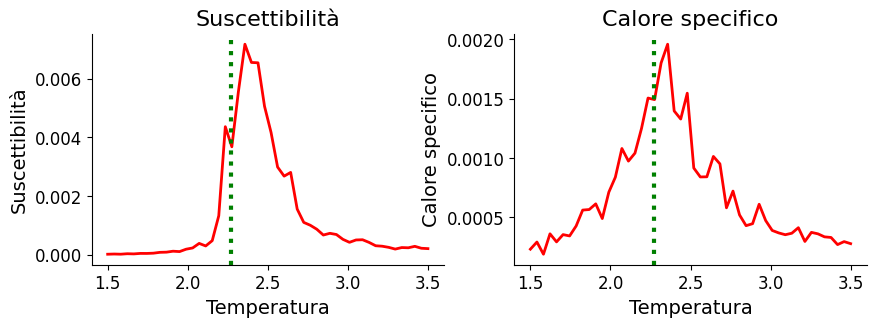

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))

#Definisco la temperatura critica
T_c = 2.269185314213022

ax=ax1
ax.plot(
    temperatures, contenitore[:, 0],
    # style keywords
    color = "red", lw = 2
)
ax.axvline(
    T_c,
    # style keywords
    c= "green", lw= "3", ls= ":"
)
ax.set_ylabel(r"Suscettibilità")
ax.set_xlabel(r"Temperatura")
ax.set_title(f"Suscettibilità")

ax=ax2
ax.plot(
    temperatures, contenitore[:, 1],
    # style keywords
    color = "red", lw = 2
)
ax.axvline(
    T_c,
    # style keywords
    c= "green", lw= "3", ls= ":"
)
ax.set_ylabel(r"Calore specifico")
ax.set_xlabel(r"Temperatura")
ax.set_title(f"Calore specifico")


### Exercise 4.15
Discuss whether or not your results proof the existence of a phase transition.

Come è possibile osservare nei grafici riportati in precedenza sia la suscettibilità che il calore specifico assumono valore massimo a una temperatura confrontabile con quella critica. Ad alte temperature l'energia di agitazione termica risulta essere dominante su quella di interazione fra spin: non sarà possibile giungere ad una situazione in cui si vengono a creare delle regioni macroscopiche caratterizzate dallo stesso spin. Una piccola variazione di temperatura (per $T >> T_c$) andrà solamente a rendere ancor più casuale la disposizione degli spin e l'applicazione di un campo di induzione magnetica esterno non è in grado di allineare gli stessi a causa dell'agitazione termica: per questo motivo sia $\chi$ che $C$ assumono bassi valori. La situazione per $T << T_c$ è diametralmente opposta poichè in questo caso le interazioni fra spin dominano sull'energia di agitazione termica dei componenti del sistema. Questo fatto consente la creazione di grandi cluster di spin in cui molti componenti ravvicinati hanno tutti la stessa direzione. In queste condizioni sperimentali si ha che una variazione di temperatura non determina una variazione nella configurazione a causa delle forti interazioni di spin e l'applicazione di un campo di induzione magnetica esterno non va a modificare la configurazione in quanto ci si trova in una condizione stabile in grado di opporsi alle influenze esterne: nuovamente si ha che $\chi$ che $C$ assumono bassi valori. La situazione è differente nell'intorno della temperatura critica in quanto i due effetti sono in attiva competizione fra loro e piccole modificazioni delle condizioni sperimentali possono portare a risposte di grande entità da parte del sistema stesso. 

# Finding clusters
Given an Ising configuration, we define a cluster of spins as a set of neighbouring spins of the same sign surrounded by spins of the opposite sign.

<img src="attachment:image.png" width="600">

### Exercise 4.16
The formal definition of cluster is very clear, but in practice, how do you find (*efficiently* if possible) all clusters for a given configuration? We need to assign a **unique cluster label** to each spin. The cluster label could be anything (a color, a letter, a number...), it just needs to be the same for all spins that belong to the same cluster. For simplicity, we will use integers.

Think about an algorithm that assigns unique cluster labels to spins. Explain your algorithm in simple words / steps / pseudocode.

Remember:
+ Clusters can trespass (periodic) boundary conditions
+ Both `+1`'s and `-1`'s can form clusters!

Il metodo implementato lavora in modo ricorsivo. Ci si pone nell'angolo in alto a sinistra della matrice delle configurazioni (di coordinate 0, 0) e si inizializza la matrice dei labels con tutte le entrate pari a -1. Si cambia la casella (0,0) in 0 nella matrice dei cluster. Si procede poi controllando i vicini del punto di partenza: essi appartengono allo stesso cluster se il prodotto fra i due vicini è pari a 1 (ossia gli spin hanno lo stesso segno). In tal caso si aggiorna il valore nella matrice labels della casella corrispondente con il numero del cluster preso in considerazione. Per evitare di fare dei controlli a vuoto gli unici vicini presi in considerazione sono quelli che nella corrispondente matrice labels hanno valore ancora pari a -1 (non sono ancora stati "accettati" in un cluster). La determinazione del primo cluster termina quando tutte le condizioni al contorno danno come esito falso. Per trovare il secondo cluster si scorre allora la matrice dei labels fino a trovare il primo elemento che sia ancora a valore -1: si salvano le coordinate e si lavora con lo stesso metodo fino a quando si è determinato il secondo cluster e così via (sulla matrice dei labels il secondo cluster sarà individuato dal numero 1 e così via). Questo metodo ha una problematica: per dimensioni eccessive delle matrici determina una chiusura del kernell di notebook. Per questo motivo le successive simulazioni saranno effettuate con matrici di dimensione 100 e non superiori.

### Exercise 4.17
Write a function that, given a configuration array `config`, returns another array `labels` where each cluster has a different label.

<img src="attachment:image.png" width="600">

Remember:
+ Clusters can trespass (periodic) boundary conditions
+ Both `+1`'s and `-1`'s can form clusters!


In [36]:
#Funzione per trovare il cluster
def expand_cluster(config, labels, i, j, c):
    
    #Effetto un controllo sui vicini del punto di coordinate i, j (passate come argomenti della funzione)
    #Voglio evitare di controllare punti da cui sono già passato (per fare questo utilizzo la matrice labels)
    
    #Dimensione della matrice
    N = len(config)
    
    #La condizione per entrare negli if è composta
    #(1) - i due elementi adiacenti devono avere lo stesso spin
    #(2) - il vicino che considero non deve già essere stato "considerato" (evito passi a vuoto che non aggiungono nulla)
    
    if(config[i, j] == config[(i+1)%N, j] and labels[(i+1)%N, j] == -1):
        #Cambio valore in matrice labels
        labels[(i+1)%N, j] = c
        #Chiamo nuovamente la funzione (mi sono spostato di una posizione)
        expand_cluster(config, labels, (i+1)%N, j, c)
    
    if(config[i, j] == config[(i-1)%N, j] and labels[(i-1)%N, j] == -1):
        #Cambio valore in matrice labels
        labels[(i-1)%N, j] = c
        #Chiamo nuovamente la funzione (mi sono spostato di una posizione)
        expand_cluster(config, labels, (i-1)%N, j, c)
    
    if(config[i, j] == config[i, (j+1)%N] and labels[i, (j+1)%N] == -1):
        #Cambio valore in matrice labels
        labels[i, (j+1)%N] = c
        #Chiamo nuovamente la funzione (mi sono spostato di una posizione)
        expand_cluster(config, labels, i, (j+1)%N, c)
    
    if(config[i, j] == config[i, (j-1)%N] and labels[i, (j-1)%N] == -1):
        #Cambio valore in matrice labels
        labels[i, (j-1)%N] = c
        #Chiamo nuovamente la funzione (mi sono spostato di una posizione)
        expand_cluster(config, labels, i, (j-1)%N, c)

In [37]:
def get_labels(config):
    """
    Get unique cluster labels.
    
    Parameters
    ----------
    config : np.array, (N, N)
        Configuration of the system in {-1, 1} notation
    Returns
    -------
    labels : np.array, (N, N)
        Labels that identify the clusters
    """
    #Dimensione della matrice degli spin
    N = len(config)
    #Matrice dei cluster (la inizializzo tutta a -1, utile per le condizioni di controllo che dobbiamo fare)
    labels = np.zeros(shape = (N,N)) - 1
    
    #Contatore che mi consente di "segnare i cluster diversi"
    c = 0
    
    for i in range(N):
        for j in range(N):
            if(labels[i,j] == -1):
                #Cambio il valore del punto di partenza del cluster
                labels[i, j] = c
                #Funzione ricorsiva che mi consente di espandere il cluster (una volta individuato il punto di partenza)
                expand_cluster(config, labels, i, j, c)
                #Aumento il contatore
                c += 1
            
    return labels

### Test your function
To help you **test** your function, I have prepared some test data, so that we can all try our algorithms using the same input.

In [38]:
config_test_0 = np.array([[ 1,  1,  1],
                          [-1, -1,  1],
                          [-1, -1,  1]])

In [39]:
config_test_1 = np.array([[ 1, -1, -1,  1, -1,  1],
                          [-1, -1, -1,  1, -1,  1],
                          [-1,  1, -1, -1, -1,  1],
                          [-1,  1, -1,  1,  1,  1],
                          [-1,  1, -1, -1,  1, -1],
                          [-1, -1, -1,  1,  1,  1]])

In [40]:
config_test_2 = np.array([[ 1, -1,  1,  1, -1,  1, -1,  1,  1,  1],
                          [-1, -1, -1,  1,  1, -1, -1, -1,  1, -1],
                          [ 1, -1,  1, -1, -1, -1,  1,  1, -1,  1],
                          [ 1, -1,  1,  1,  1, -1,  1, -1,  1, -1],
                          [-1, -1,  1,  1, -1,  1, -1,  1,  1,  1],
                          [ 1, -1, -1, -1,  1, -1,  1,  1, -1,  1],
                          [-1,  1, -1,  1,  1, -1, -1, -1,  1,  1],
                          [-1, -1, -1, -1,  1,  1, -1, -1, -1,  1],
                          [ 1,  1, -1, -1,  1, -1,  1,  1,  1,  1],
                          [ 1,  1, -1, -1, -1,  1,  1,  1,  1, -1]])


Execute the following cell to make sure your function works correctly. The left column will show the test configurations, and the right column will show the clusters your function found, with different clusters colored in different colors

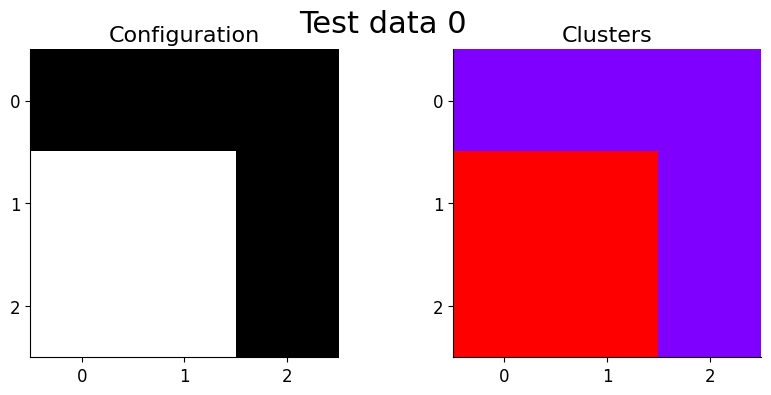

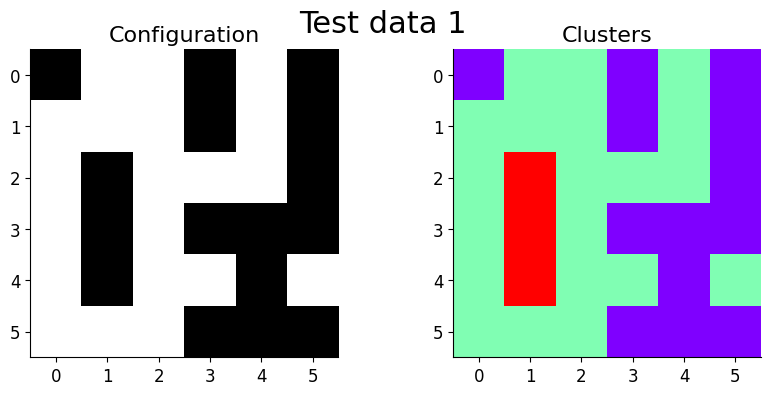

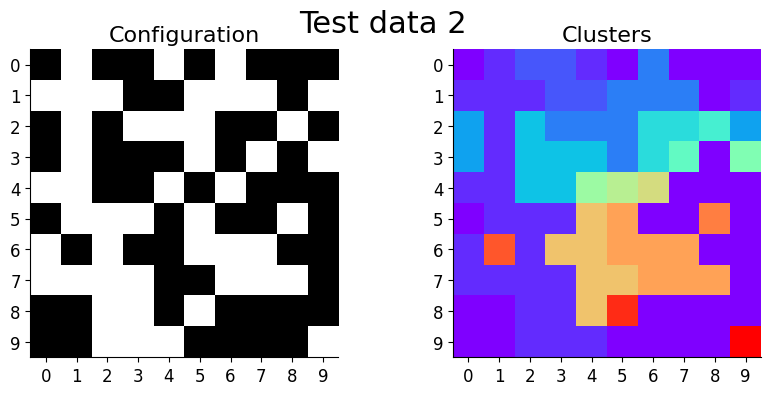

In [41]:
for i, config in enumerate([config_test_0, config_test_1, config_test_2]):
    labels = get_labels(config)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    ax1.set_xticks(range(len(config)))
    ax1.set_yticks(range(len(config)))
    ax2.set_xticks(range(len(config)))
    ax2.set_yticks(range(len(config)))
    ax1.set_title("Configuration")
    ax2.set_title("Clusters")
    ax1.imshow(config, cmap="Greys")
    ax2.imshow(labels, cmap="rainbow")
    
    fig.suptitle(f"Test data {i}", fontsize=22)

If your function doesn't work, you might want to use this cell to inspect your results

<Axes: >

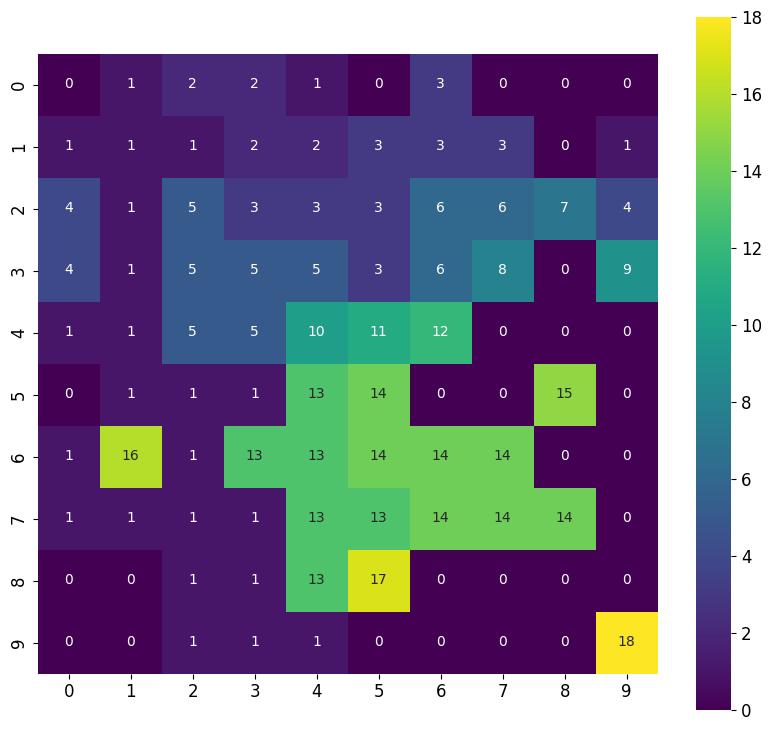

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10, 9))
ax.set_aspect(1)
sns.heatmap(labels, annot=True, ax=ax, cmap="viridis")

### Measuring cluster sizes
Use your `get_labels()` function to find clusters in a large Ising model, say $N=500$. You can use your own Ising implementation. If you use Sethna's code, remember that he uses $s \in \{0, 1\}$ spins!

In [43]:
#Pongo come dimensione N=100 (con la ricorsione non riesco ad arrivare a 500)
N = 100
T = T_c

ising = IsingModel(N=N, T=T, H=0)
#Evolvo il sistema
ising.SweepWolff(nTimes = 8)


labels = get_labels(ising.lattice)

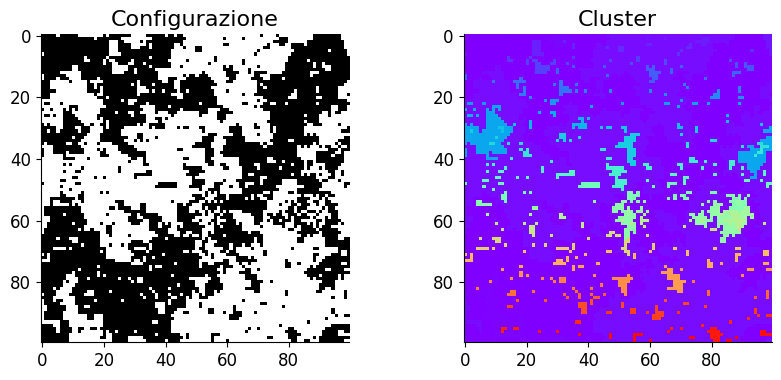

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

#Setto le dimensioni per le immagini
N = len(ising.lattice)

#Setto i titoli delle immagini
ax1.set_title("Configurazione")
ax2.set_title("Cluster")

#Creo le immagini
ax1.imshow(ising.lattice, cmap="Greys")
ax2.imshow(labels, cmap="rainbow")

I colori che vengono utilizzati nel secondo grafico (ossia quello dei cluster) non consentono di visualizzare correttamente tutti
i cluster (alcune sfumature sono molto simili).

### Exercise 4.18
Find an efficient way to measure cluster sizes. Remind that all you care about is the distribution of cluster sizes, their location does not matter. You might want to use the `.reshape()` method of a numpy array, and the `Counter` class from the `collections` package.

In [45]:
def get_sizes(labels):
    
    #Cambio la forma della matrice (la faccio diventare un vettore unidimensionale)
    prova = labels.reshape(len(labels) ** 2)
    
    #Preparo l'ambiente per la determinazione della size dei cluster
    c = col.Counter(prova)
    sizes = []
    
    #Indice i (mi servirà per individuare i cluster)
    i = 0
    
    #Ciclo che mi consente di trovare le size dei cluster    
    while(c[i] != 0):
        sizes.append(c[i])
        i += 1
    
    return sizes

### Exercise 4.19
For $T >> T_c$, spins are essentially uncorrelated. What is the distribution of cluster sizes you expect to find in this case? **Hint** Think about the 1D case assuming totally uncorrelated spins.

Ad una temperatura $T >> T_c$ l'energia di agitazione termica risulta dominante sulle interazioni di spin. In una situazione di questo genere mi aspetto di ottenere dei cluster di piccole dimensioni in quanto l'orientazione degli spin è determinata dall'agitazione termica. In particolare mi aspetto che il numero di cluster che hanno una certa dimensione decresca all'aumentare della stessa in modo esponenziale.

### Exercice 4.20
Do a simulation at very high temperature and measure the cluster size distribution. Plot your results in log-log scale. Do your results agree with your previous answer?

Come si può notare dal plot della configurazione, non si hanno cluster di dimensioni eccessive. Inoltre il numero di cluster di una data dimensione decresce all'aumentare della stessa.

In [46]:
#Temperatura e dimensione della matrice
T = T_c + 2
N = 100

#Creo il modello
config = IsingModel(N=N, T=T, H=0)
#Evolvo lo stesso per nTimes = 10
config.SweepWolff(nTimes=8)

labels = get_labels(config.lattice)
sizes = get_sizes(labels)

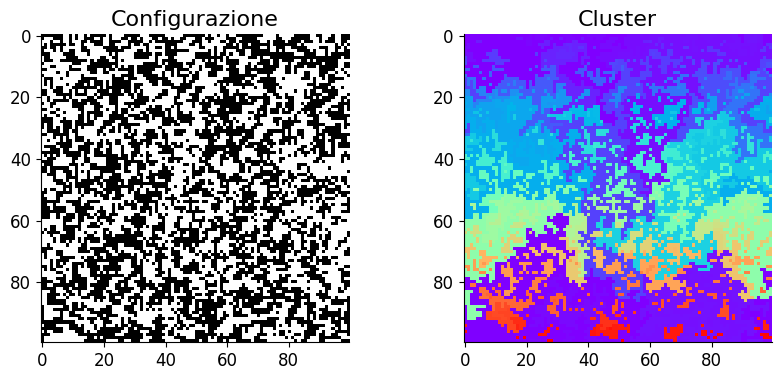

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

#Setto le dimensioni per le immagini
N = len(config.lattice)

#Setto i titoli delle immagini
ax1.set_title("Configurazione")
ax2.set_title("Cluster")

#Creo le immagini
ax1.imshow(config.lattice, cmap="Greys")
ax2.imshow(labels, cmap="rainbow")

Si nota una maggior ricchezza di cluster rispetto alla condizione precedente. Vengono riportate in seguito le varie size dei cluster ottenuti mediante simulazione:

In [48]:
print(sizes)

[1233, 260, 5, 2, 1, 18, 18, 187, 1, 5, 83, 1040, 4, 195, 225, 6, 2, 1, 1, 1, 3, 2, 7, 1, 155, 2, 1, 1, 17, 1, 2, 1, 1, 1, 1, 2, 1, 2, 9, 3, 1, 22, 37, 1, 1, 1, 107, 769, 2, 1, 5, 1, 1, 2, 202, 1, 1, 5, 1, 1, 2, 5, 1, 155, 8, 2, 2, 2, 1, 18, 1, 1, 2, 3, 1, 2, 7, 2, 1, 1, 2, 4, 38, 171, 8, 1, 1, 2, 1, 2, 1, 1, 1, 6, 1, 1, 21, 1, 16, 1, 1, 1, 1, 5, 8, 2, 5, 1, 1, 1, 22, 7, 1, 2, 1, 1, 17, 2, 1, 18, 2, 73, 2, 1, 66, 1, 141, 1, 2, 1, 1, 1, 644, 1, 1, 1, 49, 1, 11, 9, 10, 1, 1, 36, 1, 8, 1, 1, 1, 1, 1, 2, 2, 1, 14, 1, 2, 2, 1, 1, 350, 1, 1, 1, 2, 1, 1, 547, 1, 5, 1, 1, 6, 2, 1, 1, 5, 1, 3, 1, 1, 3, 15, 31, 7, 2, 5, 1, 1, 12, 1, 11, 2, 1, 6, 1, 1, 4, 1, 6, 1, 1, 1, 1, 1, 1, 6, 23, 1, 1, 8, 20, 1, 1, 2, 23, 10, 40, 2, 7, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 24, 1, 1, 1, 2, 12, 19, 1, 4, 2, 4, 1, 2, 3, 2, 1, 9, 1, 7, 1, 1, 7, 5, 3, 1, 1, 4, 4, 2, 3, 5, 33, 1, 31, 3, 85, 3, 1, 1, 1, 6, 2, 1, 1, 25, 2, 2, 1, 1, 3, 9, 1, 1, 2, 1, 2, 1, 2, 650, 1, 1, 3, 8, 1, 1, 1, 1, 1, 7, 1, 1, 1, 4, 1, 1, 74, 2, 24

Text(0.5, 0, 'Numero')

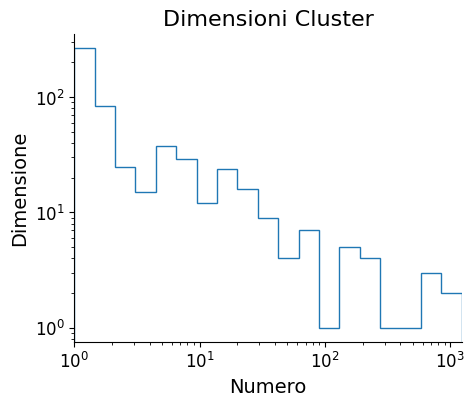

In [49]:
# use logarithmic bins and logarithmic axes!
bins = np.geomspace(min(sizes), max(sizes), num=20)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.hist(sizes, bins=bins, histtype="step")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(min(sizes), max(sizes))

ax.set_title(f"Dimensioni Cluster")
ax.set_ylabel(r"Dimensione")
ax.set_xlabel(r"Numero")

### Exercise 4.21

At $T_c$, the distribution of cluster sizes is known to be a power law with exponent close to $\alpha \simeq 2$.

$$
P(s) \propto s^{-\alpha}
$$

Do a simulation at $T=T_c$ and compare the resulting cluster size distribution with that obtained at $T>>T_c$.

In [50]:
#Fai la simulazione
T = T_c
N = 100

#Creo il modello
sistema = IsingModel(N=N, T=T, H=0)
#Evolvo lo stesso per nTimes = 8
sistema.SweepWolff(nTimes = 8)
#Metropolis(nTimes=100)

labels_cr = get_labels(sistema.lattice)
sizes_cr = get_sizes(labels_cr)

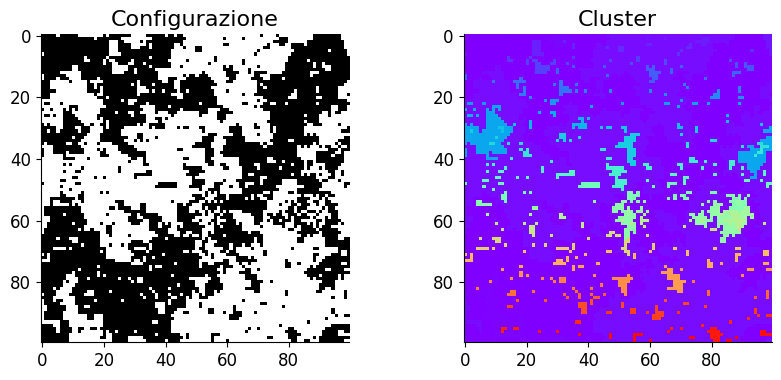

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

#Setto le dimensioni per le immagini
N = len(sistema.lattice)

#Setto i titoli delle immagini
ax1.set_title("Configurazione")
ax2.set_title("Cluster")

#Creo le immagini
ax1.imshow(sistema.lattice, cmap="Greys")
ax2.imshow(labels_cr, cmap="rainbow")

Text(0.5, 0, 'Dimensione')

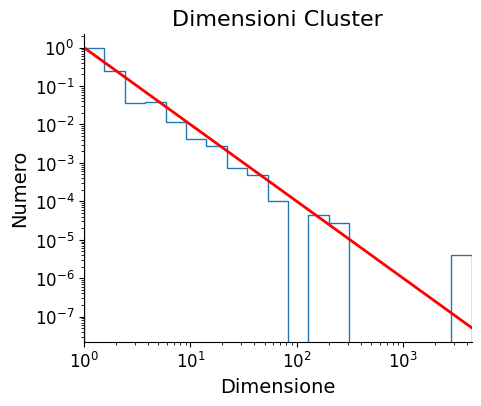

In [52]:
#Creo i bins per l'istrogramma
bins = np.geomspace(min(sizes_cr), max(sizes_cr), num=20)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.hist(
    sizes_cr, bins=bins, histtype="step",
    density = True,
)
ax.set_xscale("log")
ax.set_yscale("log")
#Setto i limiti dell'asse delle ascisse
ax.set_xlim(min(sizes_cr), max(sizes_cr))

#Plotto l'andamento aspettato
teor = np.array([
    1/t**2
    for t in bins
])
ax.plot(
    bins, teor,
    color = "red", lw = 2,
)

ax.set_title(f"Dimensioni Cluster")
ax.set_ylabel(r"Numero")
ax.set_xlabel(r"Dimensione")

Come si può notare l'andemento teorico e quello della simulazione sono sovrapponibili